# Data Preparation

### Feature and Target Separation

In [2]:
import pandas as pd

# Load datasets
creditcard_df = pd.read_csv('../data/creditcard.csv')
fraud_data_df = pd.read_csv('../data/Fraud_Data.csv')

# Separate features and target for creditcard dataset
X_creditcard = creditcard_df.drop(columns=['Class'])
y_creditcard = creditcard_df['Class']

# Separate features and target for fraud-data dataset
X_fraud_data = fraud_data_df.drop(columns=['class'])
y_fraud_data = fraud_data_df['class']

### Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

# Train-test split for creditcard dataset
X_train_creditcard, X_test_creditcard, y_train_creditcard, y_test_creditcard = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42, stratify=y_creditcard
)

# Train-test split for fraud-data dataset
X_train_fraud_data, X_test_fraud_data, y_train_fraud_data, y_test_fraud_data = train_test_split(
    X_fraud_data, y_fraud_data, test_size=0.2, random_state=42, stratify=y_fraud_data
)

# Model Selection

### We’ll use the following models for comparison:

Logistic Regression

Decision Tree

Random Forest

Gradient Boosting

Multi-Layer Perceptron (MLP)

Convolutional Neural Network (CNN)

Recurrent Neural Network (RNN)

Long Short-Term Memory (LSTM)

#  Model Training and Evaluation

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_creditcard, y_train_creditcard)

# Evaluate
y_pred_log_reg = log_reg.predict(X_test_creditcard)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_creditcard, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test_creditcard, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.69      0.74        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.8467892960504404


/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_creditcard, y_train_creditcard)

# Evaluate
y_pred_dt = dt.predict(X_test_creditcard)
print("Decision Tree Classification Report:")
print(classification_report(y_test_creditcard, y_pred_dt))

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_creditcard, y_train_creditcard)

# Evaluate
y_pred_rf = rf.predict(X_test_creditcard)
print("Random Forest Classification Report:")


Random Forest Classification Report:


In [7]:
import joblib

# Save the trained model
joblib.dump(rf, "random_forest_fraud.pkl")

print("Model saved successfully as random_forest_fraud.pkl")

Model saved successfully as random_forest_fraud.pkl


### Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_creditcard, y_train_creditcard)

# Evaluate
y_pred_gb = gb.predict(X_test_creditcard)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_creditcard, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962



###  Multi-Layer Perceptron (MLP)

In [8]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_creditcard, y_train_creditcard)

# Evaluate
y_pred_mlp = mlp.predict(X_test_creditcard)
print("MLP Classification Report:")
print(classification_report(y_test_creditcard, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.60      0.63        98

    accuracy                           1.00     56962
   macro avg       0.83      0.80      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_creditcard, y_train_creditcard)
print("Decision Tree Model after training:", dt)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_creditcard, y_train_creditcard)
print("Random Forest Model after training:", rf)

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_creditcard, y_train_creditcard)
print("Gradient Boosting Model after training:", gb)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_creditcard, y_train_creditcard)
print("MLP Model after training:", mlp)

Decision Tree Model after training: DecisionTreeClassifier(random_state=42)
Random Forest Model after training: RandomForestClassifier(random_state=42)
Gradient Boosting Model after training: GradientBoostingClassifier(random_state=42)
MLP Model after training: MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)


### Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data for CNN
X_train_creditcard_cnn = X_train_creditcard.values.reshape(X_train_creditcard.shape[0], X_train_creditcard.shape[1], 1)
X_test_creditcard_cnn = X_test_creditcard.values.reshape(X_test_creditcard.shape[0], X_test_creditcard.shape[1], 1)

# Build CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_creditcard_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_creditcard_cnn, y_train_creditcard, epochs=10, batch_size=32, validation_split=0.2)



/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-11 05:48:06.107722: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-11 05:48:06.107859: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-11 05:48:06.107865: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739281686.108401  661633 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739281686.108845  661633 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device

Epoch 1/10


2025-02-11 05:48:08.431965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 89s 15ms/step - accuracy: 0.9935 - loss: 14.0033 - val_accuracy: 0.9986 - val_loss: 1.7089
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.9984 - loss: 0.7076 - val_accuracy: 0.9993 - val_loss: 0.3049
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9985 - loss: 0.6923 - val_accuracy: 0.9986 - val_loss: 1.7740
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9986 - loss: 0.8377 - val_accuracy: 0.9991 - val_loss: 0.6648
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9986 - loss: 0.8562 - val_accuracy: 0.9987 - val_loss: 1.6384
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.9981 - loss: 2.2394 - val_accuracy: 0.9987 - val_loss: 2.1733
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.9984 - loss: 1.8261 - val_accuracy: 0.9989 - val_loss: 1.7788
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9984 - loss: 2.1

NameError: name 'classification_report' is not defined

### Directly Run Evaluation 

In [5]:
from sklearn.metrics import classification_report  # Ensure import

# Evaluate
y_pred_cnn = model_cnn.predict(X_test_creditcard_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

print("CNN Classification Report:")
print(classification_report(y_test_creditcard, y_pred_cnn))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.80      0.71        98

    accuracy                           1.00     56962
   macro avg       0.82      0.90      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### Save model after training 

In [6]:
model_cnn.save("creditcard_fraud_cnn.h5")  # Save model

### Recurrent Neural Network (RNN) and LSTM

In [7]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# Reshape data for RNN/LSTM
X_train_creditcard_rnn = X_train_creditcard.values.reshape(X_train_creditcard.shape[0], X_train_creditcard.shape[1], 1)
X_test_creditcard_rnn = X_test_creditcard.values.reshape(X_test_creditcard.shape[0], X_test_creditcard.shape[1], 1)

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train_creditcard_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_creditcard_rnn, y_train_creditcard, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate
y_pred_lstm = model_lstm.predict(X_test_creditcard_rnn)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)
print("LSTM Classification Report:")
print(classification_report(y_test_creditcard, y_pred_lstm))

/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 101s 17ms/step - accuracy: 0.9988 - loss: 0.0185 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 97s 17ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 97s 17ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 96s 17ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 96s 17ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 96s 17ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 97s 17ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 97s 17ms/step - accuracy: 0.9994 

###  SavedModel

In [10]:
model_lstm.save("lstm_model.keras")

# MLOps Steps

### Versioning and Experiment Tracking with MLflow

### Log experiments:

In [18]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Ensure datasets are defined before running the script
# Example placeholders (Replace these with actual datasets)
# X_train_creditcard, X_test_creditcard, y_train_creditcard, y_test_creditcard = ...
# X_train_fraud_data, X_test_fraud_data, y_train_fraud_data, y_test_fraud_data = ...

# Function to preprocess datasets
def preprocess_data(X):
    # Convert datetime columns to numeric timestamps
    if isinstance(X, pd.DataFrame):
        for col in X.select_dtypes(include=["datetime", "object"]).columns:
            try:
                X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to UNIX timestamp
            except:
                X.drop(columns=[col], inplace=True)  # Drop non-convertible object columns
    return X

# Apply preprocessing
X_train_creditcard = preprocess_data(X_train_creditcard)
X_test_creditcard = preprocess_data(X_test_creditcard)
X_train_fraud_data = preprocess_data(X_train_fraud_data)
X_test_fraud_data = preprocess_data(X_test_fraud_data)

# Standardizing datasets
scaler_credit = StandardScaler()
X_train_creditcard = scaler_credit.fit_transform(X_train_creditcard)
X_test_creditcard = scaler_credit.transform(X_test_creditcard)

scaler_fraud = StandardScaler()
X_train_fraud_data = scaler_fraud.fit_transform(X_train_fraud_data)
X_test_fraud_data = scaler_fraud.transform(X_test_fraud_data)

### 📌 Train and Log Logistic Regression for Credit Card Data
log_reg_credit = LogisticRegression(max_iter=500)  # Increased max_iter

with mlflow.start_run(run_name="LogReg_CreditCard"):
    mlflow.log_param("model", "Logistic Regression - Credit Card")
    
    log_reg_credit.fit(X_train_creditcard, y_train_creditcard)
    y_pred_credit = log_reg_credit.predict(X_test_creditcard)
    accuracy_credit = accuracy_score(y_test_creditcard, y_pred_credit)
    
    mlflow.log_metric("accuracy", accuracy_credit)
    
    # Log model with input example to avoid MLflow warning
    input_example_credit = np.expand_dims(X_test_creditcard[0], axis=0)
    mlflow.sklearn.log_model(log_reg_credit, "logistic_regression_credit_model", input_example=input_example_credit)

print(f"Credit Card Model Trained. Accuracy: {accuracy_credit:.4f}")

### 📌 Train and Log Logistic Regression for Fraud Detection Data
log_reg_fraud = LogisticRegression(max_iter=1000)  # Increased max_iter

with mlflow.start_run(run_name="LogReg_FraudData"):
    mlflow.log_param("model", "Logistic Regression - Fraud Data")
    
    log_reg_fraud.fit(X_train_fraud_data, y_train_fraud_data)
    y_pred_fraud = log_reg_fraud.predict(X_test_fraud_data)
    
    # Compute performance metrics
    accuracy_fraud = accuracy_score(y_test_fraud_data, y_pred_fraud)
    roc_auc_fraud = roc_auc_score(y_test_fraud_data, y_pred_fraud)
    
    mlflow.log_metric("accuracy", accuracy_fraud)
    mlflow.log_metric("roc_auc", roc_auc_fraud)

    # Log model with input example
    input_example_fraud = np.expand_dims(X_test_fraud_data[0], axis=0)
    mlflow.sklearn.log_model(log_reg_fraud, "logistic_regression_fraud_model", input_example=input_example_fraud)

print("\nLogistic Regression (Fraud_Data) Classification Report:")
print(classification_report(y_test_fraud_data, y_pred_fraud))
print(f"ROC AUC Score: {roc_auc_fraud:.4f}")

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_73190/195552534.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to UNIX timestamp
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_73190/195552534.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to UNIX timestamp
/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_73190/195552534.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col]).as

Credit Card Model Trained. Accuracy: 0.9991

Logistic Regression (Fraud_Data) Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27393
           1       0.00      0.00      0.00      2830

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223

ROC AUC Score: 0.5000


/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### Compare Model Performance

### Evaluate All Models for creditcard Dataset

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the evaluate_model function
def evaluate_model(model, X_test, y_test, is_probabilistic=False):
    if model is None:
        return {"Accuracy": None, "Precision": None, "Recall": None, "F1-Score": None, "ROC-AUC": None}
    
    y_pred = model.predict(X_test)

    # If the model outputs probabilities, convert them to binary (0 or 1)
    if is_probabilistic:
        y_pred = (y_pred > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    }

# Ensure models are trained before evaluation
if "dt" not in locals():
    print("⚠️ Training Decision Tree...")
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier()
    dt.fit(X_train_creditcard, y_train_creditcard)

if "rf" not in locals():
    print("⚠️ Training Random Forest...")
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train_creditcard, y_train_creditcard)

if "gb" not in locals():
    print("⚠️ Training Gradient Boosting...")
    from sklearn.ensemble import GradientBoostingClassifier
    gb = GradientBoostingClassifier()
    gb.fit(X_train_creditcard, y_train_creditcard)

if "mlp" not in locals():
    print("⚠️ Training MLP...")
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier()
    mlp.fit(X_train_creditcard, y_train_creditcard)

# Evaluate all models
performance_summary_creditcard = {
    "Logistic Regression": evaluate_model(log_reg, X_test_creditcard, y_test_creditcard),
    "Decision Tree": evaluate_model(dt, X_test_creditcard, y_test_creditcard),
    "Random Forest": evaluate_model(rf, X_test_creditcard, y_test_creditcard),
    "Gradient Boosting": evaluate_model(gb, X_test_creditcard, y_test_creditcard),
    "MLP": evaluate_model(mlp, X_test_creditcard, y_test_creditcard),
    "CNN": evaluate_model(model_cnn, X_test_creditcard_cnn, y_test_creditcard, is_probabilistic=True),
    "LSTM": evaluate_model(model_lstm, X_test_creditcard_rnn, y_test_creditcard, is_probabilistic=True)
}

# Convert results to DataFrame
performance_df_creditcard = pd.DataFrame(performance_summary_creditcard).T

# Print the performance summary
print("\nPerformance Summary (Credit Card Fraud Detection):")
print(performance_df_creditcard)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

Performance Summary (Credit Card Fraud Detection):
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.999140   0.826667  0.632653  0.716763  0.816212
Decision Tree        0.999140   0.752577  0.744898  0.748718  0.872238
Random Forest        0.999596   0.941176  0.816327  0.874317  0.908119
Gradient Boosting    0.998315   0.529412  0.183673  0.272727  0.591696
MLP                  0.999561   0.910112  0.826531  0.866310  0.913195
CNN                  0.998859   0.634146  0.795918  0.705882  0.897564
LSTM                 0.999333   0.800000  0.816327  0.808081  0.907987


# Use MLflow to Track Experiments

In [41]:
import mlflow
import mlflow.sklearn
import pandas as pd
from mlflow.models import infer_signature

# Convert NumPy array to DataFrame (if not already a DataFrame)
X_train_creditcard_df = pd.DataFrame(X_train_creditcard)

# Train your model
log_reg.fit(X_train_creditcard, y_train_creditcard)

# ✅ Generate input example and signature
input_example = X_train_creditcard_df.iloc[:1]  # Take a single row as an example input
signature = infer_signature(X_train_creditcard, log_reg.predict(X_train_creditcard))

# ✅ Log experiment
with mlflow.start_run():
    mlflow.log_param("dataset", "creditcard")
    mlflow.log_param("model", "Logistic Regression")
    
    metrics = evaluate_model(log_reg, X_test_creditcard, y_test_creditcard)
    for metric_name, metric_value in metrics.items():
        mlflow.log_metric(metric_name, metric_value)
    
    # ✅ Log model with input example & signature
    mlflow.sklearn.log_model(
        log_reg, 
        "logistic_regression_model",
        input_example=input_example,
        signature=signature
    )

###  Define a Function to Log Experiments

In [42]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def log_experiment(model, X_train, y_train, X_test, y_test, dataset_name, model_name):
    """
    Logs an experiment using MLflow.
    """
    with mlflow.start_run():
        # Log parameters
        mlflow.log_param("dataset", dataset_name)
        mlflow.log_param("model", model_name)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = model.predict(X_test)
        metrics = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_pred)
        }
        
        # Log metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)
        
        # Log the model
        mlflow.sklearn.log_model(model, model_name)
        
        print(f"Logged {model_name} for {dataset_name} dataset.")

### Define Models and Datasets

In [43]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Define datasets
datasets = {
    "creditcard": (X_train_creditcard, y_train_creditcard, X_test_creditcard, y_test_creditcard),
    "Fraud_Data": (X_train_fraud_data, y_train_fraud_data, X_test_fraud_data, y_test_fraud_data)
}

### Log Experiments for All Models and Datasets

In [44]:
# Log experiments for all models and datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for model_name, model in models.items():
        log_experiment(model, X_train, y_train, X_test, y_test, dataset_name, model_name)

2025/02/11 10:45:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Logistic Regression for creditcard dataset.


2025/02/11 10:45:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Decision Tree for creditcard dataset.


2025/02/11 10:49:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest for creditcard dataset.


2025/02/11 10:56:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Gradient Boosting for creditcard dataset.


2025/02/11 10:58:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged MLP for creditcard dataset.


/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025/02/11 10:58:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Logistic Regression for Fraud_Data dataset.


2025/02/11 10:58:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Decision Tree for Fraud_Data dataset.


2025/02/11 10:59:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest for Fraud_Data dataset.


2025/02/11 11:00:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Gradient Boosting for Fraud_Data dataset.


2025/02/11 11:02:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged MLP for Fraud_Data dataset.


### View Logged Experiments

bash: mlflow ui

# Create a Performance Summary Table

### Define a Function to Evaluate Models

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a model and returns a dictionary of metrics.
    """
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    }

### Evaluate All Models for Both Datasets

In [49]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Define datasets
datasets = {
    "creditcard": (X_train_creditcard, y_train_creditcard, X_test_creditcard, y_test_creditcard),
    "Fraud_Data": (X_train_fraud_data, y_train_fraud_data, X_test_fraud_data, y_test_fraud_data)
}

# Initialize a dictionary to store performance results
performance_summary = {}

# Evaluate all models for both datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Evaluate the model
        metrics = evaluate_model(model, X_test, y_test)
        
        # Store results in the performance_summary dictionary
        performance_summary[f"{dataset_name} - {model_name}"] = metrics

/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Convert the Results into a DataFrame

In [50]:
import pandas as pd

# Convert the performance summary dictionary to a DataFrame
performance_df = pd.DataFrame(performance_summary).T

# Add a column for the dataset and model names
performance_df.reset_index(inplace=True)
performance_df.rename(columns={"index": "Dataset - Model"}, inplace=True)

# Display the performance summary table
print("Performance Summary Table:")
print(performance_df)

Performance Summary Table:
                    Dataset - Model  Accuracy  Precision    Recall  F1-Score  \
0  creditcard - Logistic Regression  0.999140   0.826667  0.632653  0.716763   
1        creditcard - Decision Tree  0.999140   0.752577  0.744898  0.748718   
2        creditcard - Random Forest  0.999596   0.941176  0.816327  0.874317   
3    creditcard - Gradient Boosting  0.998315   0.529412  0.183673  0.272727   
4                  creditcard - MLP  0.999561   0.910112  0.826531  0.866310   
5  Fraud_Data - Logistic Regression  0.906363   0.000000  0.000000  0.000000   
6        Fraud_Data - Decision Tree  0.907521   0.505636  0.554770  0.529065   
7        Fraud_Data - Random Forest  0.954538   0.976440  0.527208  0.684718   
8    Fraud_Data - Gradient Boosting  0.954306   0.971987  0.527208  0.683620   
9                  Fraud_Data - MLP  0.952619   0.972936  0.508127  0.667595   

    ROC-AUC  
0  0.816212  
1  0.872238  
2  0.908119  
3  0.591696  
4  0.913195  
5  0.500

### Save the Performance Summary Table

In [52]:
# Save the performance summary table to a CSV file
performance_df.to_csv("performance_summary.csv", index=False)
print("Performance summary saved to 'performance_summary.csv'.")

Performance summary saved to 'performance_summary.csv'.


### Visualize the Results

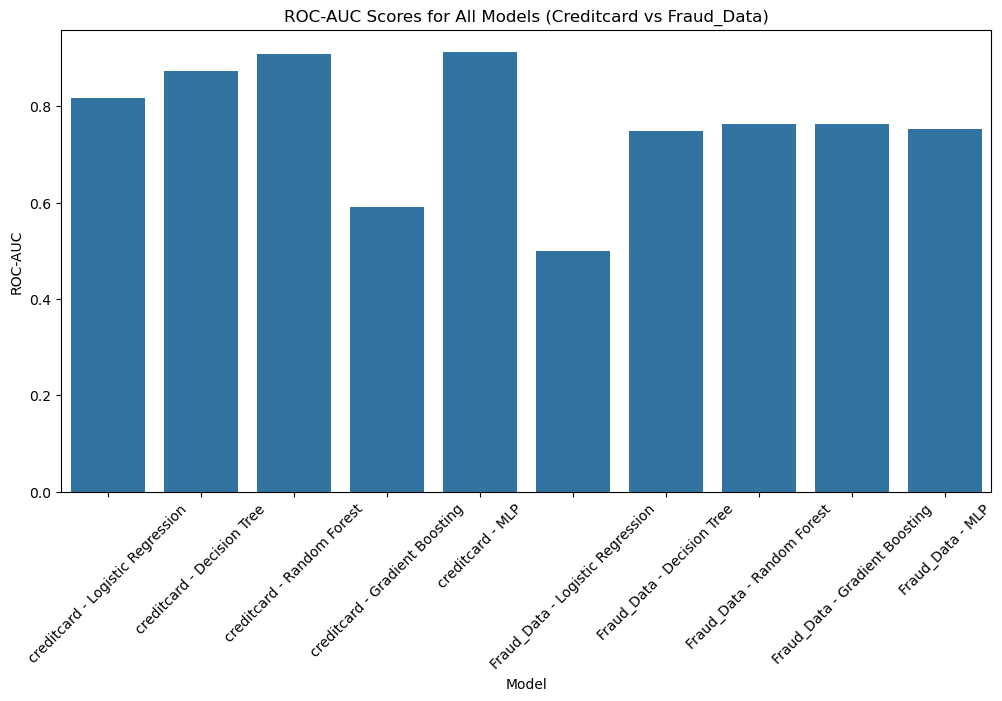

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df["Dataset - Model"], y=performance_df["ROC-AUC"])
plt.title("ROC-AUC Scores for All Models (Creditcard vs Fraud_Data)")
plt.xlabel("Model")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=45)
plt.show()